# Simulator vs. Quantum Machines


We can run the device indepdent tests on a real quantum machine and a simulator to compare the result. We have used
'ibmq_qasm_simulator', and 'ibmq_16_melbourne' to run these tests, an

In [8]:
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, IBMQ
from qiskit.tools.monitor import *
from qiskit.providers.ibmq.managed import IBMQJobManager

provider = IBMQ.load_account()

import matplotlib.pyplot as plt
import numpy as np

import context
from device_independent_test.handshake import HandShake
from device_independent_test.quantum_communicator import LocalDispatcher

ibmqfactory.load_account:WARNING:2020-06-30 21:25:57,863: Credentials are already in use. The existing account in the session will be replaced.


In [5]:
dispatcher = LocalDispatcher([provider.get_backend('ibmq_qasm_simulator')])
handshake = HandShake(dispatcher)

max_shots = 8192

def get_params(shots):
     return {
        "dimensionality": {
            "tolerance": 0.3,
            "shots": shots
        },
        "entanglement": {
            "tolerance": 0.7,
            "shots": shots
        },
        "measurement_incompatibility": {
            "tolerance": 0.5,
            "shots": shots
        }
    }

handshake.test_all(get_params(max_shots))

Passed Dimensionality with value:  1.0
Passed Measurment Incompatibility with value:  6.84375
Passed Entanglement with value:  2.8232421875


True

In [6]:
dispatcher = LocalDispatcher([provider.get_backend('ibmq_16_melbourne')])
handshake.test_all(get_params(shots=max_shots))

Passed Dimensionality with value:  1.0
Passed Measurment Incompatibility with value:  6.8165283203125
Passed Entanglement with value:  2.840087890625


True

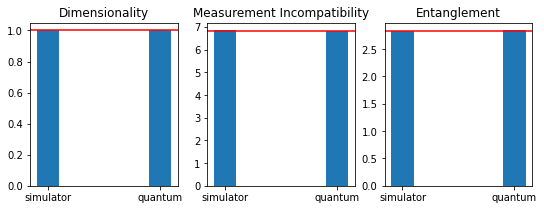

In [60]:
names = ["simulator", "quantum"]
dimensionality = [1.0, 1.0]
measurement_incompatibility = [6.84375, 6.8165283203125]
entanglement = [2.8232421875, 2.840087890625]
expected = {
    "dimensionality": 1.0,
    "measurement_incompatibility": 6.82842712475,
    "entanglement": 2.8284271247461903
}

plt.figure(figsize=(9,3))

plt.subplot(131)
index = np.arange(2)
width = 0.2
plt.bar(index, dimensionality, align='center', width=width)
plt.axhline(expected["dimensionality"], color='red')
plt.xticks(index, names)
plt.title('Dimensionality')

plt.subplot(132)
plt.bar(index, measurement_incompatibility, align='center', width=width)
plt.axhline(expected["measurement_incompatibility"], color='red')
plt.xticks(index, names)
plt.title('Measurement Incompatibility')

plt.subplot(133)
plt.bar(index, entanglement, align='center', width=width)
plt.axhline(expected["entanglement"], color="red")
plt.xticks(index, names)
plt.title('Entanglement')
plt.show()

